<a href="https://colab.research.google.com/github/kangwonlee/nmisp/blob/main/50_ode/20_Heun_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [1]:
# This cell is for the Google Colaboratory
# https://stackoverflow.com/a/63519730
if 'google.colab' in str(get_ipython()):
  path_py = '/content/nmisp_py'

  import os
  if not os.path.exists(path_py):
    import subprocess
    subprocess.run(
        ('git', 'clone', 'https://github.com/kangwonlee/nmisp_py')
    )
  assert os.path.exists(path_py)

  import sys
  sys.path.insert(0, path_py)



In [2]:
# 그래프, 수학 기능 추가
# Add graph and math features
import pylab as py
import numpy as np
import numpy.linalg as nl



# 상미분방정식을 위한 훈의 방법<br>Heun's Method for Ordinary Differntial Equations



## 오일러법 사례 검토<br>Review of Euler Method



다시 한번 다음 1계 미분 방정식을 생각해 보자.<br>Once again, let's think about the following first order differential equation again.



$$
\left\{
    \begin{align}
        a_0 \frac{d}{dt}x(t)+a_1 x(t)&=0 \\
        x(0)&=x_0 \\
    \end{align}
\right.
$$



알고있다시피, python 함수로는 다음과 같이 쓸 수 있다.<br>
We know that we can write it as a python function as follows.



In [3]:
a_0, a_1 = 2.0, 1.0

def dx_dt(t, x):
    return - a_1 * x / a_0



## 훈의 방법<br>Heun's Method



훈의 방법은 독일 수학자 칼 훈의 이름을 딴 것이다.<br>
Heun's Method is named after German mathematician Karl Heun.



훈의 방법은 다음 두 값의 평균을 $t_i \le t \le t_{i+1}$ 사이에서 대표적인 $\frac{d}{dt}x$ 값으로 가정한다.<br>
Heun's Method assumes the average of following two as the representative $\frac{d}{dt}x$ value within $t_i \le t \le t_{i+1}$ interval.



$$
    s_i=\frac{d}{dt}x\left(t_{i}\right) \\
    s_{i+1}=\frac{d}{dt}x\left(t_{i+1}\right)
$$



그런데, $x(t_{i+1})$의 엄밀해를 알지 못하는 상태에서 어떻게 $s_{i+1}=\frac{d}{dt}x\left(t_{i+1}\right)$ 을 계산할 것인가?<br>
Now, how can we calculate $\frac{d}{dt}x=\left.\frac{d}{dt}x\right|_{t=t_{i+1}}$ without knowing the exact solution of $x(t)$?



오일러법으로 구한 $\left.x\right|_{t=t_{i+1}}$의 근사값 $\left.\hat{x}\right|_{t=t_{i+1}}$으로 $\frac{d}{dt}x=\left.\frac{d}{dt}x\right|_{t=t_{i+1}}$을 사용할 것이다.<br>
We would use $\frac{d}{dt}x=\left.\frac{d}{dt}x\right|_{t=t_{i+1}}$ using $\left.\hat{x}\right|_{t=t_{i+1}}$, the approximation of $\left.x\right|_{t=t_{i+1}}$ by the Euler Method.



### 요약 Summary


$(t_i, x_i)$ 으로부터 $t_{i+1}$ 지점의 $x_{i+1}$을 구하는 과정을 비교해 보자.<br>
Let's compare the steps to find $x_{i+1}$ of $t_{i+1}$ from $(t_i, x_i)$.



* 오일러법 Euler's method

| Equation 수식        | Description 설명                                |
|:-------------------:|:-----------------------------------------------:|
| $$s_i = f(t_i, x_i)$$ | $t_i$ 와 $x_i$ 로 $t_i$ 에서의 기울기 $s_i$를 계산<br>Calculate slope $s_i$ at  $t_i$ using  $t_i$ and $x_i$ |
| $x_{i+1}=x_i + s_i \Delta t$ | $x_i$ 에서 출발하여 기울기 $s_i$를 따라 $\Delta t$ 만큼 전진하여 $x_{i+1}$를 결정<br>Starting from $x_i$, follow slope $s_i$ forward by $\Delta t$ to decide $x_{i+1}$ |


* Heun's method (Modified Euler's method) 훈의 방법 (수정오일러법)

| Equation 수식        | Description 설명                                |
|:-------------------:|:-----------------------------------------------:|
| $$s_i = f(t_i, x_i)$$ | $t_i$ 와 $x_i$ 로 $t_i$ 에서의 기울기 $s_i$를 계산<br>Calculate slope $s_i$ at  $t_i$ using  $t_i$ and $x_i$ |
| $\hat{x}_{i+1}=x_i + s_i \Delta t$ | Starting from $x_i$, follow slope $s_i$ forward by $\Delta t$ to predict $\hat{x}_{i+1}$<br>$x_i$ 에서 출발하여 기울기 $s_i$를 따라 $\Delta t$ 만큼 전진하여 $\hat{x}_{i+1}$를 예측 |
| $ \hat{s}_{i+1}=f(t_{i+1}, \hat{x}_{i+1}) $ | Estimate slope $\hat{s}_{i+1}$ at $t_{i+1}$ using prediction $\hat{x}_{i+1}$ <br>예측한 $\hat{x}_{i+1}$ 를 이용하여 $t_{i+1}$ 에서의 기울기 $\hat{s}_{i+1}$ 를 추정 |
| $ s_{Heun} = \frac{1}{2}\left( s_i + \hat{s}_{i+1} \right) $ | Correct slope $ s_{Heun}$ representing $t_i$ ~ $t_{i+1}$ interval by taking average of $s_i$ and $\hat{s}_{i+1}$<br>$s_i$ 와 $\hat{s}_{i+1}$ 의 평균으로 $t_i$ ~ $t_{i+1}$ 구간의 기울기 $ s_{Heun}$ 를 수정  |
| $ x_{i+1} = x_i + s_{Heun} \Delta t $ | 기울기 $ s_{Heun}$ 를 따라 $\Delta t$ 만큼 전진하여 $x_{i+1}$ 를 결정<br>Decide $x_{i+1}$ by going foward by $\Delta t$ following slope $ s_{Heun}$ |



| Euler | Heun |
|:------:|:------:|
| $$ s_i = f(t_i, x_i)  $$| $$ s_i = f(t_i, x_i)  $$ |
| $$ x_{i+1}=x_i + s_i \Delta t $$ | $$ \hat{x}_{i+1}=x_i + s_i \Delta t $$ |
| $$    $$ | $$ \hat{s}_{i+1}=f(t_{i+1}, \hat{x}_{i+1}) $$ |
| $$    $$ | $$ s_{Heun} = \frac{1}{2}\left(s_i + \hat{s}_{i+1}\right) $$ |
| $$    $$ | $$ x_{i+1} = x_i + s_{Heun} \Delta t $$ |



In [4]:
def heun(f, t_array, x_0):
    time_list = [t_array[0]]
    result_list = [x_0]

    x_i = x_0

    for k, t_i in enumerate(t_array[:-1]):
        # time step
        delta_t = t_array[k+1] - t_array[k]

        # slope at i
        s_i = f(t_i, x_i)

        # x[i + 1] by Euler
        x_i_plus_1 = x_i + s_i * delta_t

        # slope at i + 1
        s_i_plus_1 = f(t_array[k+1], x_i_plus_1)

        # average of slope
        s_average = (s_i + s_i_plus_1) * 0.5

        # x[i + 1] by Heun
        x_i_plus_1_m = x_i + s_average * delta_t

        time_list.append(t_array[k+1])
        result_list.append(x_i_plus_1_m)

        x_i = x_i_plus_1_m

    return time_list, result_list



### 근사해와 방향장<br>Approximate solutions and direction fields



엄밀해, 오일러법, 훈의 방법을 방향장과 겹쳐 그려보자.<br>
Let's overlap the exact solution, Forware Euler Method, and Heun's Method with the direction field.



In [5]:
import ode_plot
import ode_solver



$t$와 $x$의 범위<br>
Ranges of $t$ and $x$



In [6]:
t_slopes = py.linspace(0, 6)
x_slopes = py.linspace(0, 6)



초기값<br>Initial value<br>
$x(t_0)$



In [7]:
x_0 = 4.5



$
\Delta t = 0.5
$ (sec)



In [8]:
delta_t_05 = 0.5
t_05_sec = np.arange(t_slopes[0], t_slopes[-1] + delta_t_05*0.5, delta_t_05)



오일러법<br>Euler method



In [9]:
t_euler_out, x_euler_out = ode_solver.euler(dx_dt, t_05_sec, x_0)



훈의 방법<br>
Heun's method<br>
매개변수가 모두 같다는 점을 주목하시오.<br>
Please note that the arguments are the same.



In [10]:
t_heun__out, x_heun__out = heun(dx_dt, t_05_sec, x_0)



이제 그려 보자.<br>Now let's plot.



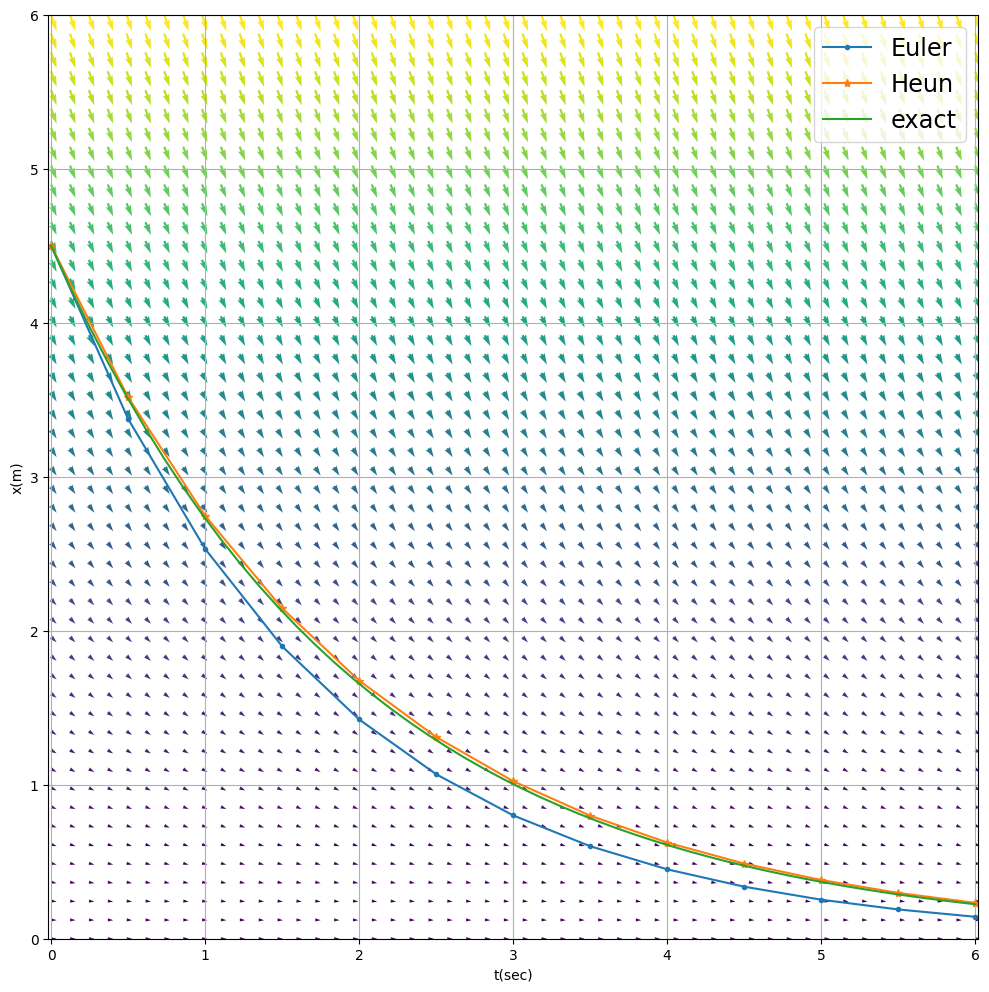

In [11]:
# Slopes at each (t, x) points
ode_plot.ode_slope_1state(dx_dt, x_slopes, t_slopes)

py.plot(t_euler_out, x_euler_out, '.-', label='Euler')
py.plot(t_heun__out, x_heun__out, '*-', label='Heun')

# Exact solution
exact = ode_plot.ExactPlotterFirstOrderODE(t_slopes)
exact.plot()

# Aspect ratio
py.axis('equal')

# xy limits
py.xlim(left=t_slopes[0], right=t_slopes[-1])
py.ylim(bottom=x_slopes[0], top=x_slopes[-1])

py.legend(loc=0, fontsize='xx-large');



오일러법에 비해 훈의 방법의 근사해가 엄밀해에 비해 오차가 더 적은 것을 알 수 있다.<br>
We can see that the approximate solution of Heun's Method is closer to the exact solution than that the Euler Method.



## Scipy



In [12]:
import scipy.integrate as si



In [13]:
sol = si.solve_ivp(dx_dt, (t_heun__out[0], t_heun__out[-1]), [x_0], t_eval=t_heun__out)



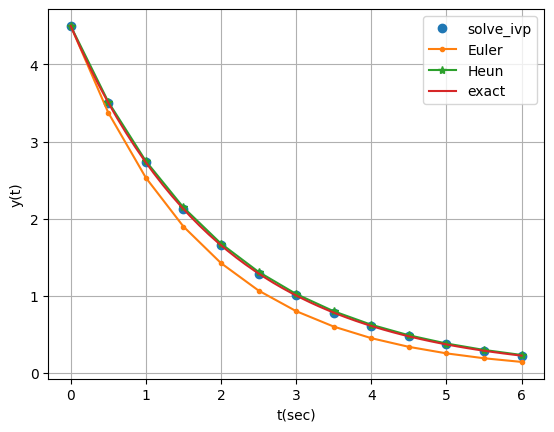

In [14]:
py.plot(sol.t, sol.y[0, :], 'o', label='solve_ivp')
py.plot(t_euler_out, x_euler_out, '.-', label='Euler')
py.plot(t_heun__out, x_heun__out, '*-', label='Heun')

# plot exact solution
exact = ode_plot.ExactPlotterFirstOrderODE(t_slopes)
exact.plot()
py.grid(True)
py.xlabel('t(sec)')
py.ylabel('y(t)')
py.legend(loc=0);



In [15]:
import pandas as pd


df = pd.DataFrame(
    data={
        'euler':x_euler_out,
        'heun' :x_heun__out,
        'solve_ivp':sol.y[0, :],
        'exact':exact.exact(py.array(t_heun__out))
    },
    index=pd.Series(t_heun__out, name='t(sec)'),
    columns=['exact', 'euler', 'heun', 'solve_ivp']
)



In [16]:
df['euler_error'] = df.euler - df.exact
df['heun_error'] = df.heun - df.exact
df['solve_ivp_error'] = df.solve_ivp - df.exact



표 형태<br>Table form



In [17]:
pd.set_option('display.max_rows', 10)
df



,exact,euler,heun,solve_ivp,euler_error,heun_error,solve_ivp_error
t(sec),,,,,,,
0.0,4.500000,4.500000,4.500000,4.500000,0.000000,0.000000,0.000000
0.5,3.504604,3.375000,3.515625,3.504471,-0.129604,0.011021,-0.000133
1.0,2.729388,2.531250,2.746582,2.729371,-0.198138,0.017194,-0.000017
1.5,2.125649,1.898438,2.145767,2.125431,-0.227212,0.020118,-0.000219
2.0,1.655457,1.423828,1.676381,1.654516,-0.231629,0.020923,-0.000942
...,...,...,...,...,...,...,...
4.0,0.609009,0.450508,0.624500,0.609055,-0.158501,0.015492,0.000047
4.5,0.474297,0.337881,0.487891,0.474635,-0.136415,0.013594,0.000338
5.0,0.369382,0.253411,0.381165,0.369771,-0.115972,0.011782,0.000389


각종 통계<br>Statistics



In [18]:
df.describe()



,exact,euler,heun,solve_ivp,euler_error,heun_error,solve_ivp_error
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1.504219,1.351721,1.518504,1.504253,-0.152498,0.014286,0.000034
std,1.353179,1.369509,1.351204,1.353029,0.068029,0.005981,0.000392
min,0.224042,0.142544,0.232645,0.224288,-0.231629,0.000000,-0.000942
25%,0.474297,0.337881,0.487891,0.474635,-0.203182,0.011021,-0.000133
50%,1.004086,0.800903,1.023182,1.004657,-0.158501,0.015492,0.000047
75%,2.125649,1.898438,2.145767,2.125431,-0.115972,0.019096,0.000294
max,4.500000,4.500000,4.500000,4.500000,0.000000,0.020923,0.000571


이 경우, 훈의 방법의 오차에 대한 의견은?<br>
In this case, what do you think about the error of the Heun's method?



In [19]:
import numpy.linalg as nl


nl.norm(df.euler_error), nl.norm(df.heun_error), nl.norm(df.solve_ivp_error),



(0.5982124900819591, 0.05551826809506176, 0.0013650493070240782)

## 연습 문제<br>Exercises



### 01



다음 미분방정식의 엄밀해를 구하시오:<br>
Find exact solution of the following differential equation:

$$
\begin{align}
10 \frac{d}{dt}x(t) + 100 x(t) &= 0 \\
x(0) &= 10
\end{align}
$$



위 미분방정식의 수치해를 오일러법으로 구하시오.<br>
Find numerical solution of the above differential equation using Euler Method.



위 미분방정식의 수치해를 훈의 방법으로 구하고 엄밀해, 오일러법과 비교하시오.<br>
Find numerical solution of the above differential equation using Heun's method and compare with exact solution and Euler Method.



### 02



다음 미분방정식의 수치해를 오일러법으로 구하시오:<br>
Find numerical solution of the following differential equation using Euler Method:

$$
\begin{align}
10 \frac{d}{dt}x(t) + 100 x(t) &= sin(t[rad]) \\
x(0) &= 0
\end{align}
$$



위 미분방정식의 수치해를 훈의 방법으로 구하고 오일러법과 비교하시오.<br>
Find numerical solution of the above differential equation using Heun's method and compare with Euler Method.



## Final Bell<br>마지막 종



In [20]:
# stackoverfow.com/a/24634221
import os
os.system("printf '\a'");

